# Computing with biochemical networks
## Biocham v4.0α demo, Lifeware-DCR meeting
#### September 27th, 2016 -- Sylvain Soliman

---

Biochemical networks?

In [1]:
clear_model.
a => a + b.   % _ =[a]=> b, a -> b
a -< a.     % a => _
present(a, 10).

In [2]:
list_ode.
numerical_simulation(time: 5).
plot.

[0] d(a)/dt= -a
[1] d(b)/dt=a


In [3]:
numerical_simulation(time: 5, method: ssa).
plot.
numerical_simulation(time: 20, method: pn).
plot.

In [4]:
generate_ctl.

reachable(stable(b))
reachable(steady(a))


*François Fages and Sylvain Soliman. **Abstract interpretation and types for systems biology**. Theoretical Computer Science, 403(1):52--70, 2008.*

$Stochastic\ Semantics \subseteq Discrete\ Semantics \subseteq Boolean\ Semantics$

*François Fages, Thierry Martinez, David Rosenblueth, Sylvain Soliman. **Influence Systems vs Reaction Systems**. In CMSB'16: Proceedings of the fourteenth international conference on Computational Methods in Systems Biology, volume 9859 of Lecture Notes in BioInformatics. Springer-Verlag, 2016.*

---

The MAPK cascade:
![NR](NatureReviews_MolCellBiol_mapk.jpg)

![HF1996pnas](HF1996pnas_header.jpg)

![HF1996pnas](HF1996pnas_cascade.jpg)

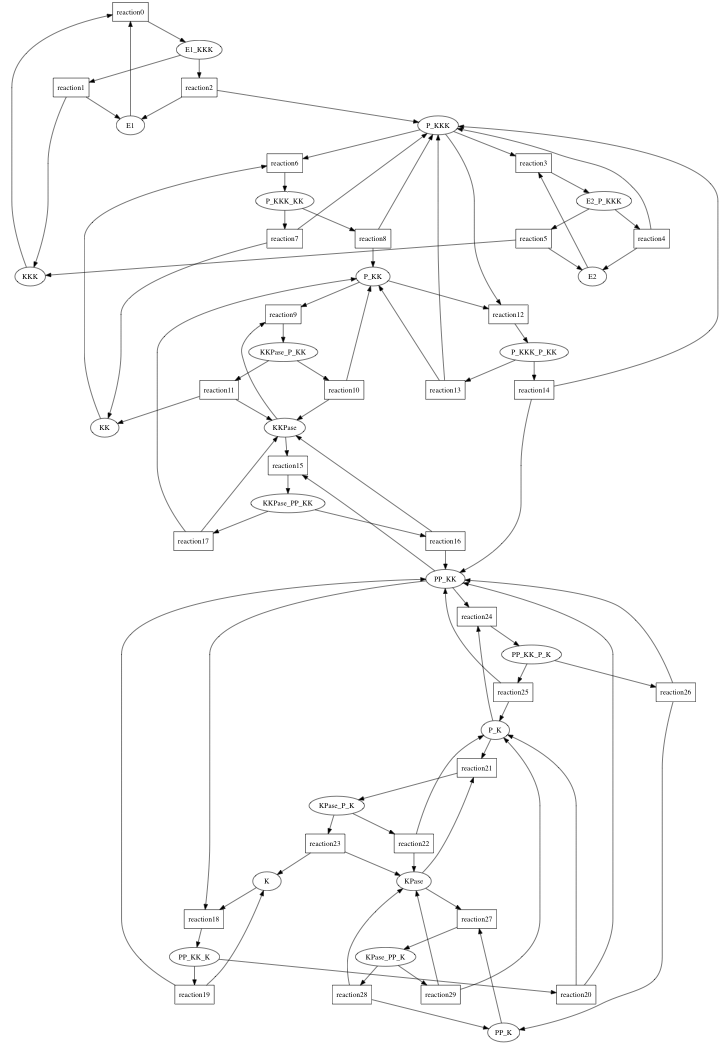

In [5]:
load('library:biomodels/BIOMD0000000009.xml').
draw_reactions.

In [6]:
list_model.

r1a__a1*E1*KKK for KKK+E1=>E1_KKK.
r1a__d1*E1_KKK for E1_KKK=>KKK+E1.
r1b__k2*E1_KKK for E1_KKK=>E1+P_KKK.
r2a__a2*E2*P_KKK for P_KKK+E2=>E2_P_KKK.
r2a__d2*E2_P_KKK for E2_P_KKK=>P_KKK+E2.
r2b__k2*E2_P_KKK for E2_P_KKK=>E2+KKK.
r3a__a3*KK*P_KKK for KK+P_KKK=>P_KKK_KK.
r3a__d3*P_KKK_KK for P_KKK_KK=>KK+P_KKK.
r3b__k3*P_KKK_KK for P_KKK_KK=>P_KK+P_KKK.
r4a__a4*P_KK*KKPase for P_KK+KKPase=>KKPase_P_KK.
r4a__d4*KKPase_P_KK for KKPase_P_KK=>P_KK+KKPase.
r4b__k4*KKPase_P_KK for KKPase_P_KK=>KK+KKPase.
r5a__a5*P_KK*P_KKK for P_KK+P_KKK=>P_KKK_P_KK.
r5a__d5*P_KKK_P_KK for P_KKK_P_KK=>P_KK+P_KKK.
r5b__k5*P_KKK_P_KK for P_KKK_P_KK=>PP_KK+P_KKK.
r6a__a6*PP_KK*KKPase for PP_KK+KKPase=>KKPase_PP_KK.
r6a__d6*KKPase_PP_KK for KKPase_PP_KK=>PP_KK+KKPase.
r6b__k6*KKPase_PP_KK for KKPase_PP_KK=>P_KK+KKPase.
r7a__a7*K*PP_KK for K+PP_KK=>PP_KK_K.
r7a__d7*PP_KK_K for PP_KK_K=>K+PP_KK.
r7b__k7*PP_KK_K for PP_KK_K=>P_K+PP_KK.
r8a__a8*P_K*KPase for P_K+KPase=>KPase_P_K.
r8a__d8*KPase_P_K for KPase_P_K=>P_K+KP

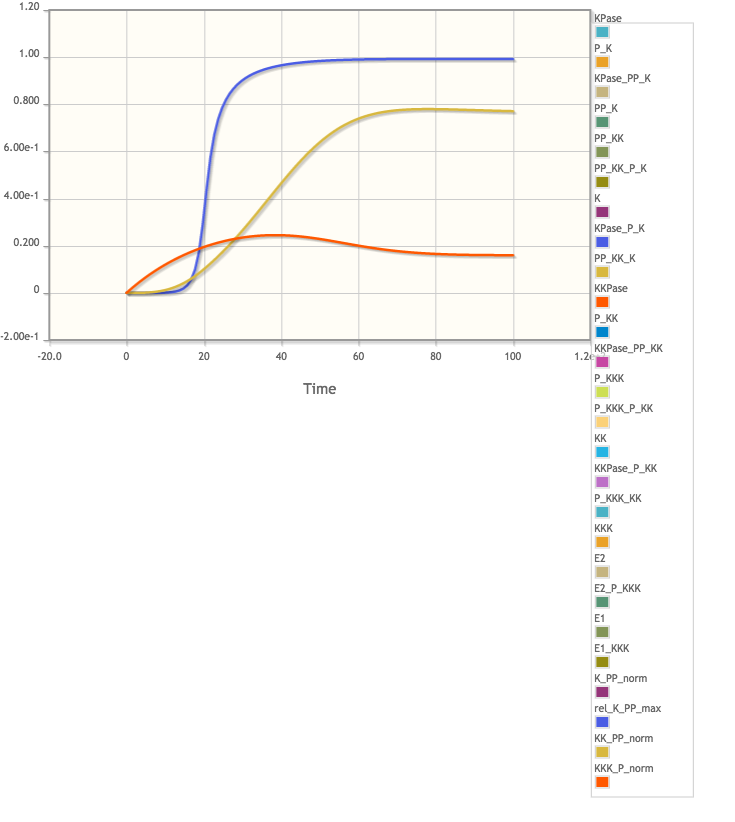

In [7]:
numerical_simulation(time: 100).
plot(show: {rel_K_PP_max, KK_PP_norm, KKK_P_norm}).

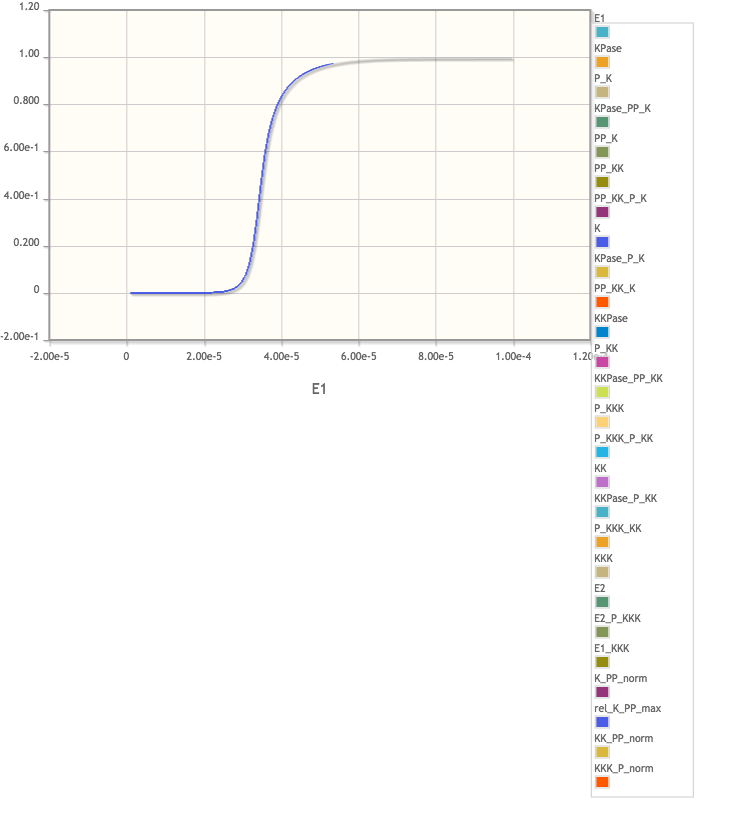

In [8]:
dose_response(E1, 1e-6, 1e-4, time:100, show:rel_K_PP_max).

In [9]:
generate_ctl(oscil(x)).

oscil('E1')
oscil('E1_KKK')
oscil('E2')
oscil('E2_P_KKK')
oscil('K')
oscil('KK')
oscil('KKK')
oscil('KKPase')
oscil('KKPase_PP_KK')
oscil('KKPase_P_KK')
oscil('KPase')
oscil('KPase_PP_K')
oscil('KPase_P_K')
oscil('PP_K')
oscil('PP_KK')
oscil('PP_KK_K')
oscil('PP_KK_P_K')
oscil('P_K')
oscil('P_KK')
oscil('P_KKK')
oscil('P_KKK_KK')
oscil('P_KKK_P_KK')


---
*How can we have oscillations without negative feedback reactions?*

*Do the boolean oscillations exist in the continuous semantics?*

The answer is yes to both: **there is both (strict) positive and negative feedback in the influence network!**

---

*Sylvain Soliman. **A stronger necessary condition for the multistationarity of chemical reaction networks**. Bulletin of Mathematical Biology, 75(11):2289--2303, November 2013.*

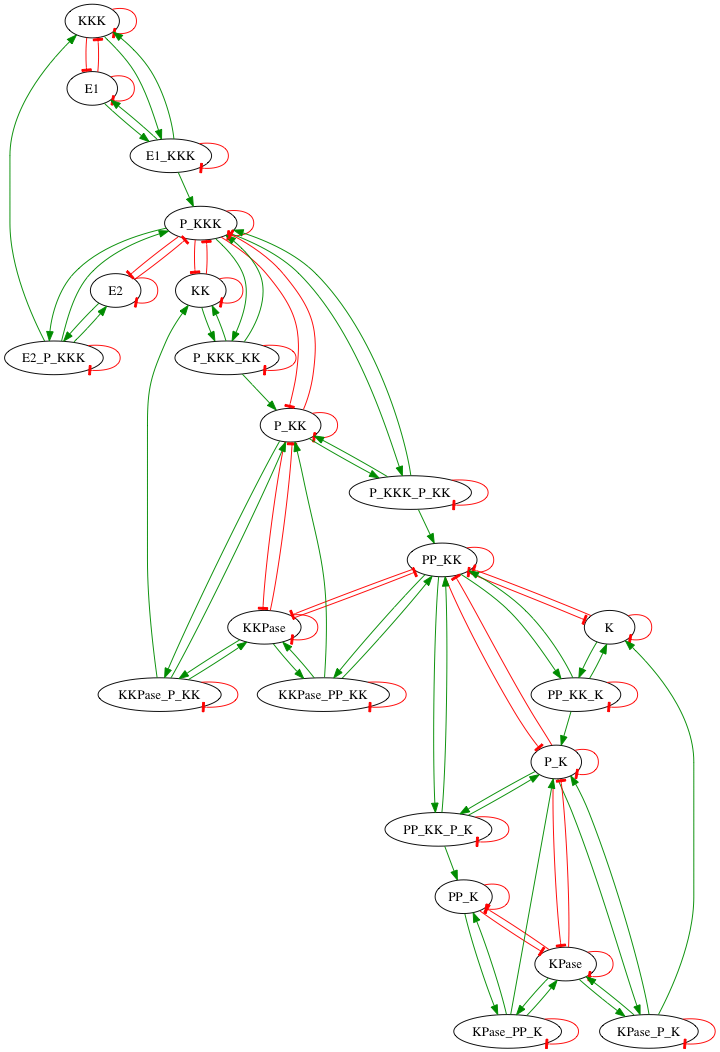

In [10]:
draw_influences.

Only one level is enough for multistability, but double phosphorylation is needed (Journal of Cell Biology, Feb. 2004)

![Kholodenko](bistability_header.jpg)

![figure](bistability_figure.jpg)

In [11]:
load('library:biomodels/BIOMD0000000027.xml').
list_model.

k1cat*MAPKK*M/Km1/ (1+M/Km1+Mp/Km2)for M=[MAPKK]=>Mp.
k2cat*MAPKK*Mp/Km2/ (1+M/Km1+Mp/Km2)for Mp=[MAPKK+M]=>Mpp.
k3cat*MKP3*Mpp/Km3/ (1+Mpp/Km3+Mp/Km4+M/Km5)for Mpp=[MKP3+M]=>Mp.
k4cat*MKP3*Mp/Km4/ (1+Mpp/Km3+Mp/Km4+M/Km5)for Mp=[MKP3+Mpp]=>M.
present(M,500.0).
present(Mp,0.0).
present(Mpp,0.0).
present(MAPKK,50.0).
present(MKP3,100.0).
parameter(
  uVol = 1.0,
  k1cat = 0.01,
  Km1 = 50.0,
  k2cat = 15.0,
  Km2 = 500.0,
  k3cat = 0.084,
  Km3 = 22.0,
  k4cat = 0.06,
  Km4 = 18.0,
  Km5 = 78.0
).


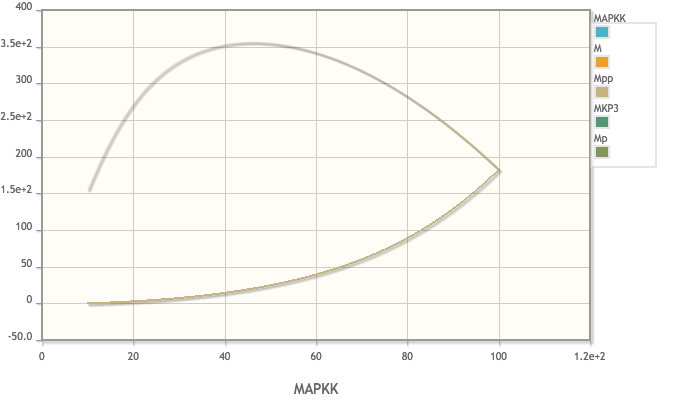

In [12]:
bifurcations(MAPKK, 10, 100, time:1000, show:Mpp).

We have found a natural mechanism for an ultrasensitive switch
i.e., an analog-digital converter!

Can we "program" such a converter?
For instance $\frac{x^4}{1 + x^4}$?

Let us start with the **G**eneral **P**urpose **A**nalog **C**omputer [Shannon 41]
4 types of block:
- constant
- sum
- product
- integral

We can compile those blocks to biochemical reactions!